# K-Means Clustering

## Pengertian K-Means Clustering

K-Means clustering adalah algoritma unsupervised learning yang digunakan untuk mengelompokkan data ke dalam beberapa kelompok atau klaster berdasarkan kesamaan fitur atau karakteristik. Algoritma ini berusaha untuk meminimalkan jarak antara titik data dan pusat klaster (centroid) mereka, sehingga data dengan karakteristik yang sama akan dikelompokkan atau dijadikan satu klaster.


## Tujuan dan Cara Kerja

Tujuan dari K-Means Clustering adalah mengelompokkan data menjadi beberapa kelompok (kluster) sehingga data dalam satu kluster memiliki karakteristik yang mirip, sementara data antar kluster memiliki karakteristik yang berbeda. K-Means clustering sering digunakan dalam berbagai bidang, seperti segmentasi gambar, segmentasi pelanggan, riset pasar, dan pengelompokan dokumen.

**Cara Kerja:**
- Mengumpulkan atau menyiapkan data yang ingin dikelompokkan.
- Menentukan jumlah klaster yang diinginkan.
- Inisialisasi centroid secara acak.
- Memberi label klaster pada setiap titik data berdasarkan jarak terdekat ke centroid.
- Menghitung centroid baru dengan mengambil nilai rata-rata dari semua titik data yang masuk dalam klaster tersebut.
- Melakukan iterasi langkah 3 dan 4 hingga centroid tidak berubah secara signifikan atau mencapai kriteria konvergensi.



## Inertia (Sum Square error/SSE)


Dalam konteks algoritma K-Means Clustering, inertia (juga dikenal sebagai Sum of Squared Errors/SSE) merupakan metrik evaluasi yang digunakan untuk menilai kualitas pengelompokan data ke dalam klaster. Nilai ini menggambarkan total jumlah kuadrat jarak antara setiap titik data dan pusat klaster (centroid) yang menaunginya. Semakin kecil nilai inertia, semakin baik data tersebar rapat di sekitar centroid masing-masing klaster.

Inertia didefinisikan sebagai:

$$
\text{Inertia} = \sum_{i=1}^{n} \left\| x_i - \mu_{c_i} \right\|^2
$$

**Penjelasan Notasi**
- $x_i$: Titik data ke-$i$
- $\mu_{c_i}$: Centroid dari klaster tempat $x_i$ berada
- $\left\| x_i - \mu_{c_i} \right\|^2$: Jarak Euclidean kuadrat antara $x_i$ dan centroid-nya
- $n$: Jumlah total data

## Silhouette Analysis


Silhouette Analysis merupakan metrik evaluasi alternatif yang sering dianggap lebih unggul dibandingkan inertia dalam banyak kasus untuk menilai hasil clustering, seperti pada algoritma K-Means. Hal ini karena Silhouette Analysis mempertimbangkan dua aspek secara bersamaan, yaitu:

- Seberapa rapat data dalam satu klaster (kepadatan internal)

- Seberapa jauh klaster tersebut dari klaster lainnya (pemisahan antar klaster)

Silhouette Analysis mengukur seberapa mirip suatu titik data dengan klasternya sendiri dibandingkan dengan klaster terdekat lainnya. Rumusnya adalah:

$$
s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
$$

**Penjelasan Notasi**:
- $a(i)$: Rata-rata jarak dari titik $i$ ke semua titik lain dalam klaster yang sama (cohesion)
- $b(i)$: Rata-rata jarak dari titik $i$ ke semua titik dalam klaster terdekat yang bukan miliknya (separation)
- $s(i)$: Skor silhouette untuk titik $i$, dengan nilai antara -1 dan 1

Nilai skor $s(i)$ ditafsirkan sebagai berikut:
- Jika $s(i) \approx 1$, maka titik berada jauh dari klaster lain dan cocok dengan klasternya
- Jika $s(i) \approx 0$, maka titik berada di antara dua klaster
- Jika $s(i) \approx -1$, maka titik bisa jadi salah masuk klaster

Untuk mengevaluasi seluruh hasil clustering, digunakan rata-rata dari semua $s(i)$:

$$
S = \frac{1}{n} \sum_{i=1}^{n} s(i)
$$

- $n$: Jumlah total data
- $S$: Silhouette score rata-rata seluruh data


## Implementasi K-Means Menggunakan Data Iris

In [2]:
%pip install pymysql
%pip install psycopg2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 2.7 MB/s eta 0:00:00


### Menyiapkan Library yang digunakan

Menyiapkan library yang akan digunakan seperti:


*   StandardScaler, MinMaxScaler untuk data preprocessing.
*   KMeans, adjusted_rand_score, silhoutte_score untuk clustering dan evaluasi.
* matplotlib, seaborn, Axes3D untuk visualisasi.
* psycopg2, pymysql untuk database.
* PCA untuk reduksi dimensi.
* pandas, numpy untuk manipulasi data.



In [3]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import silhouette_score
import psycopg2
import pymysql
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D

## Data Understanding

### Mengumpulkan Data Iris

Mengambil data iris di dua database lalu menggabungkan keduanya. Terdapat 4 kolom data yakni id, class, petal length, petal width, sepal length, dan sepal width.

In [4]:
def get_pg_data():
    conn = psycopg2.connect(
        host="pg-8eb1f4b-posgresqltugas2.g.aivencloud.com",
        user="avnadmin",
        password="AVNS_ycUbNT1QT31C8JC_cFL",
        database="defaultdb",
        port=10681
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM iris_progres")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

def get_mysql_data():
    conn = pymysql.connect(
        host="posgresqltugas2-sqltugas2.i.aivencloud.com",
        user="avnadmin",
        password="AVNS_wYxnNK8agAOz67Wu1Ok",
        database="amelia",
        port=12195
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM flowers")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)


# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id' dan 'Class'
df_merged = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Cetak semua data hasil gabungan tanpa indeks
print(df_merged.to_string(index=False))

 id           class  petal length  petal width  sepal length  sepal width
  1     Iris-setosa          14.0         20.0          51.0         35.0
  2     Iris-setosa          14.0         20.0          40.9         30.0
  3     Iris-setosa          13.0         20.0          47.0         32.0
  4     Iris-setosa          15.0         20.0          46.0         31.0
  5     Iris-setosa          14.0         20.0          50.0         36.0
  6     Iris-setosa           1.7          0.4          54.0         39.0
  7     Iris-setosa           1.4          0.3           4.6          3.4
  8     Iris-setosa           1.5          0.2           5.0          3.4
  9     Iris-setosa           1.4          0.2           4.4          2.9
 10     Iris-setosa           1.5          0.1           4.9          3.1
 11     Iris-setosa           1.5          0.2           5.4          3.7
 12     Iris-setosa           1.6          0.2           4.8          3.4
 13     Iris-setosa           1.4     

### Menampilkan Data Sebelum Normalisasi

Menampilkan data sebelum dinormalisasi dengan mengambil kolom yang hanya berisi data numerik. Disini saya menghapus kolom id dan class dari dataFrame.

In [5]:
# Ambil hanya fitur numerik (hapus kolom non-numerik)
features_before_scaling = df_merged.drop(columns=['id', 'class'])

print (features_before_scaling.to_string(index=False));

 petal length  petal width  sepal length  sepal width
         14.0         20.0          51.0         35.0
         14.0         20.0          40.9         30.0
         13.0         20.0          47.0         32.0
         15.0         20.0          46.0         31.0
         14.0         20.0          50.0         36.0
          1.7          0.4          54.0         39.0
          1.4          0.3           4.6          3.4
          1.5          0.2           5.0          3.4
          1.4          0.2           4.4          2.9
          1.5          0.1           4.9          3.1
          1.5          0.2           5.4          3.7
          1.6          0.2           4.8          3.4
          1.4          0.1           4.8          3.0
          1.1          0.1           4.3          3.0
          1.2          0.2           5.8          4.0
          1.5          0.4           5.7          4.4
          1.3          0.4           5.4          3.9
          1.4          0.3  

### Visualisasi Data Asli Sebelum Normalisasi

#### Visualisasi 2D Tanpa Menggunakan PCA  

Membuat visualisasi 2D data asli sebelum dinormalisasi tanpa menggunakan PCA.

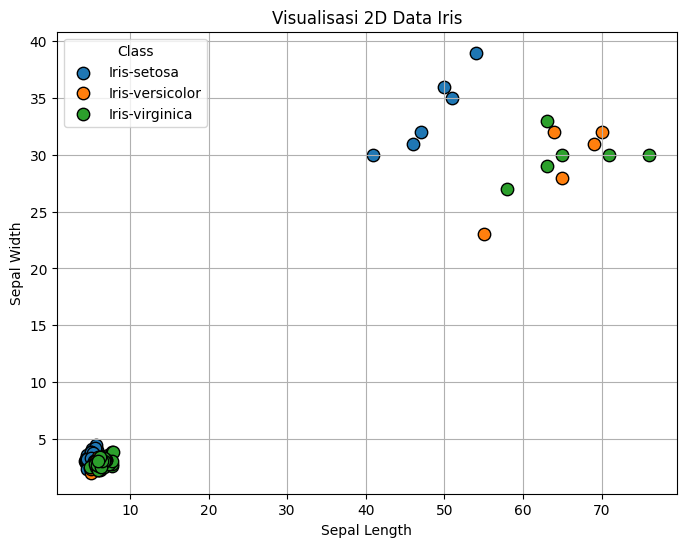

In [6]:
# Ubah kolom 'class' menjadi kategori jika belum
df_merged['class'] = df_merged['class'].astype('category')

# Plot 2D scatter plot
plt.figure(figsize=(8, 6))
for label in df_merged['class'].cat.categories:
    subset = df_merged[df_merged['class'] == label]
    plt.scatter(subset['sepal length'], subset['sepal width'], label=label, s=80, edgecolors='k')

plt.title("Visualisasi 2D Data Iris")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend(title='Class')
plt.grid(True)
plt.show()

#### Visualisasi 3D Tanpa Menggunakan PCA

Membuat visualisasi 3D data asli sebelum dinormalisasi tanpa menggunakan PCA.

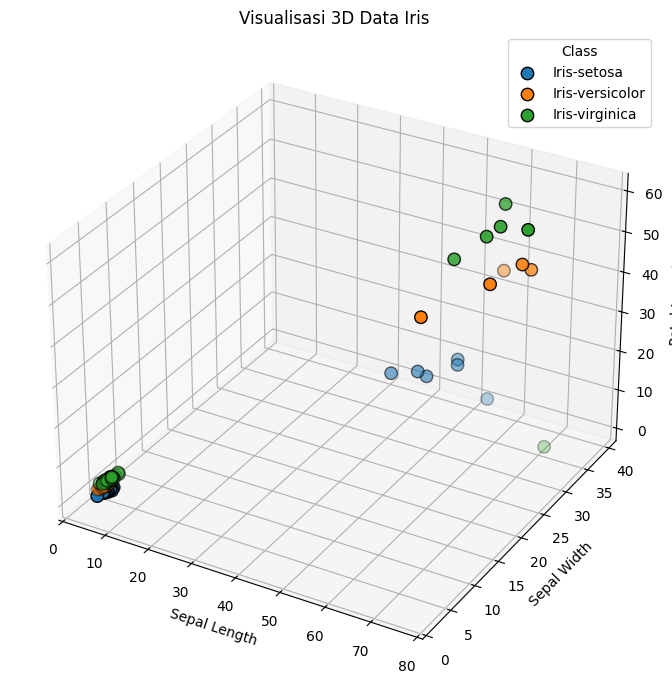

In [7]:
df_merged['class'] = df_merged['class'].astype('category')

# Plot 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

for label in df_merged['class'].cat.categories:
    subset = df_merged[df_merged['class'] == label]
    ax.scatter(
        subset['sepal length'],
        subset['sepal width'],
        subset['petal length'],
        label=label,
        s=80,
        edgecolors='k'
    )

ax.set_title("Visualisasi 3D Data Iris")
ax.set_xlabel("Sepal Length")
ax.set_ylabel("Sepal Width")
ax.set_zlabel("Petal Length")
ax.legend(title='Class')
plt.tight_layout()
plt.show()

#### Visualisasi 2D Menggunakan PCA (Prinsipal Component Analysis)

Membuat visualisasi 2D data asli sebelum dinormalisasi menggunakan PCA. PCA merupakan teknik yang digunakan untuk mereduksi dimensi data (jumlah fitur/kolom) dengan mempertahankan variansi maksimum. Namun sebaiknya PCA digunakan setelah data dinormalisasi atau standarisasi, karena PCA sensitif terhadap skala fitur. Disini tujuan membuat visualisasi data sebelum dilakukan normalisasi menggunakan PCA ialah untuk melihat perbedaan data sebelum dan sesudah dilakukan normalisasi.

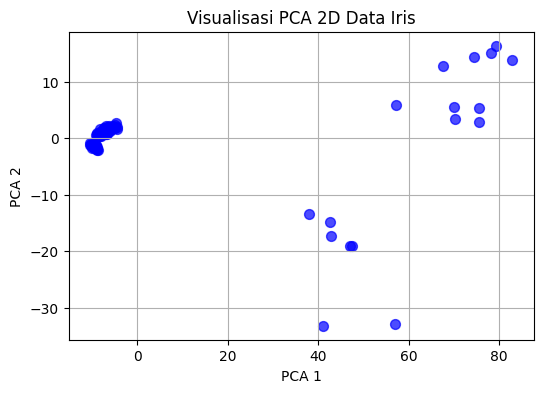

In [8]:
# Ambil hanya fitur numerik (hapus kolom non-numerik)
features_before_scaling = df_merged.drop(columns=['id', 'class'])

# PCA langsung pada data mentah (belum dinormalisasi)
pca_raw = PCA(n_components=2)
reduced_raw = pca_raw.fit_transform(features_before_scaling)

# Visualisasi 2D hasil PCA sebelum normalisasi
plt.figure(figsize=(6, 4))
plt.scatter(reduced_raw[:, 0], reduced_raw[:, 1], c='blue', s=50, alpha=0.7)
plt.title("Visualisasi PCA 2D Data Iris")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()

#### Visualisasi 3D Menggunakan PCA (Prinsipal Component Analysis)

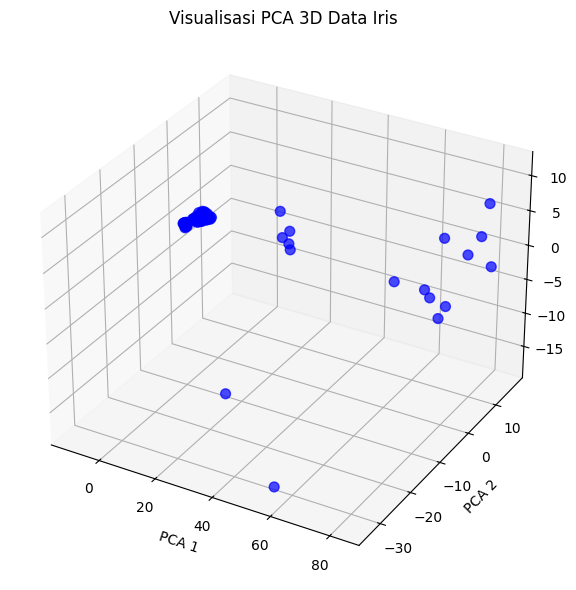

In [9]:
# Ambil hanya fitur numerik (hapus kolom non-numerik)
features_before_scaling = df_merged.drop(columns=['id', 'class'])

# PCA ke 3 komponen tanpa normalisasi
pca_raw_3d = PCA(n_components=3)
reduced_raw_3d = pca_raw_3d.fit_transform(features_before_scaling)

# Visualisasi 3D hasil PCA sebelum normalisasi
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(
    reduced_raw_3d[:, 0],
    reduced_raw_3d[:, 1],
    reduced_raw_3d[:, 2],
    c='blue',
    s=50,
    alpha=0.7
)

ax.set_title("Visualisasi PCA 3D Data Iris")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.grid(True)
plt.tight_layout()
plt.show()

## Preprocessing dan Reduksi Dimensi

### Standarisasi Menggunakan MinMaxScaler

Di sesi ini saya melakukan normalisasi data menggunakan MinMaxScaler dengan tujuan menyamakan skala seluruh fitur dalam dataset. Hal ini menjadi langkah krusial untuk data yang masing-masing fiturnya memiliki rentang nilai yang berbeda, yang dapat mempengaruhi perhitungan jarak seperti KNN dan SVM.

Cara kerja MinMaxScaler ialah mengubah setiap nilai pada fitur dengan rentang nilai antara 0 hingga 1, berdasarkan nilai minimum dan maksimum dari fitur tersebut. Dengan begitu tidak ada fitur yang mendominasi proses perhitungan hanya karena memiliki nilai yang lebih besar.

Rumus:
$$
{Xscaled = (X - Xmin) / (Xmax - Xmin)}
$$

In [10]:
# Drop kolom non-numerik
features = df_merged.drop(columns=['id', 'class'])

# Normalisasi dengan MinMaxScaler
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

# Reduksi dimensi untuk visualisasi
pca = PCA(n_components=3)
reduced_features = pca.fit_transform(scaled_features)

### Menampilkan Data Setelah Standarisasi

Setelah dilakukan normalisasi menggunakan MinMaxScaler keempat fitur data memiliki rentang nilai antara 0 hingga 1.

In [11]:
print (scaled_features)

[[0.22033898 0.79919679 0.65132497 0.89189189]
 [0.22033898 0.79919679 0.51046025 0.75675676]
 [0.20338983 0.79919679 0.59553696 0.81081081]
 [0.23728814 0.79919679 0.58158996 0.78378378]
 [0.22033898 0.79919679 0.63737796 0.91891892]
 [0.01186441 0.01204819 0.69316597 1.        ]
 [0.00677966 0.00803213 0.0041841  0.03783784]
 [0.00847458 0.00401606 0.0097629  0.03783784]
 [0.00677966 0.00401606 0.0013947  0.02432432]
 [0.00847458 0.         0.0083682  0.02972973]
 [0.00847458 0.00401606 0.0153417  0.04594595]
 [0.01016949 0.00401606 0.0069735  0.03783784]
 [0.00677966 0.         0.0069735  0.02702703]
 [0.00169492 0.         0.         0.02702703]
 [0.00338983 0.00401606 0.0209205  0.05405405]
 [0.00847458 0.01204819 0.0195258  0.06486486]
 [0.00508475 0.01204819 0.0153417  0.05135135]
 [0.00677966 0.00803213 0.0111576  0.04054054]
 [0.01186441 0.00803213 0.0195258  0.04864865]
 [0.00847458 0.00803213 0.0111576  0.04864865]
 [0.01186441 0.00401606 0.0153417  0.03783784]
 [0.00847458 

### Clustering Pada Data Iris Menggunakan K-Means Menjadi 2 Cluster

Setelah data dinormalisasi menggunakan MinMaxScaler, pada sesi ini dilakukan proses clustering menggunakan algoritma KMeans menjadi 2 cluster. Pada sesi ini juga dilakukan perhitungan inersia dan silhoutte score. Untuk menjamin hasil yang optimal algoritma dijalankan sebanyak 10 kali lalu dipilih hasil terbaik berdasarkan nilai inersia terendah. Kemudian dilakukan visualisasi data 2D dan 3D menggunakan PCA.

#### Visualisasi 2D Clustering Pada Data Iris Menggunakan K-Means Menjadi 2 Cluster

[2 Clusters] Inertia: 3.8919, Silhouette Score: 0.9163


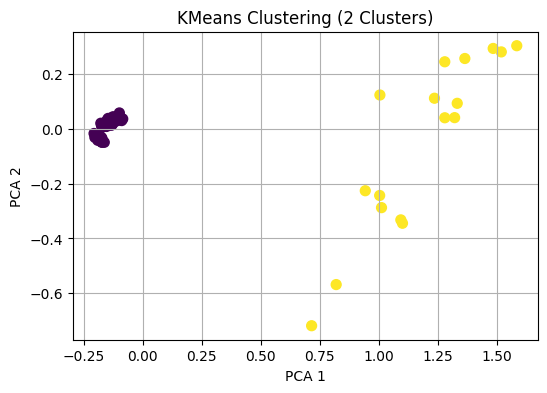

In [12]:
# KMeans dengan 2 cluster
kmeans_2 = KMeans(n_clusters=2, random_state=42, n_init=10)
labels_2 = kmeans_2.fit_predict(scaled_features)

# Metode evaluasi
inertia_2 = kmeans_2.inertia_
silhouette_2 = silhouette_score(scaled_features, labels_2)

print(f"[2 Clusters] Inertia: {inertia_2:.4f}, Silhouette Score: {silhouette_2:.4f}")

# Visualisasi
plt.figure(figsize=(6, 4))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels_2, cmap='viridis', s=50)
plt.title("KMeans Clustering (2 Clusters)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()


#### Visualisasi 3D Clustering Pada Data Iris Menggunakan K-Means Menjadi 2 Cluster

[2 Clusters] Inertia: 3.8919, Silhouette Score: 0.9163


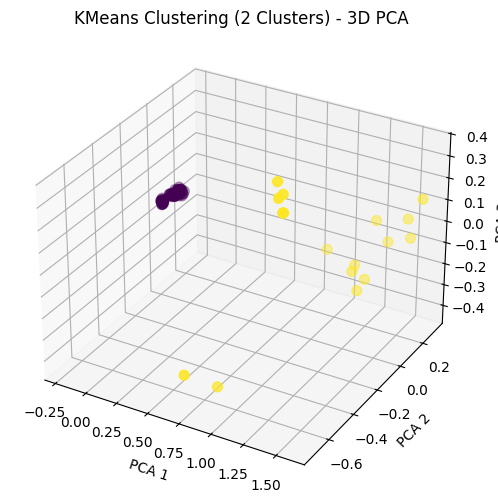

In [13]:
# PCA dengan 3 komponen untuk visualisasi 3D
pca_3d = PCA(n_components=3)
reduced_features_3d = pca_3d.fit_transform(scaled_features)

# KMeans dengan 2 cluster
kmeans_2 = KMeans(n_clusters=2, random_state=42, n_init=10)
labels_2 = kmeans_2.fit_predict(scaled_features)

# Metode evaluasi
inertia_2 = kmeans_2.inertia_
silhouette_2 = silhouette_score(scaled_features, labels_2)

print(f"[2 Clusters] Inertia: {inertia_2:.4f}, Silhouette Score: {silhouette_2:.4f}")

# Visualisasi 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    reduced_features_3d[:, 0],
    reduced_features_3d[:, 1],
    reduced_features_3d[:, 2],
    c=labels_2, cmap='viridis', s=50
)

ax.set_title("KMeans Clustering (2 Clusters) - 3D PCA")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.grid(True)
plt.show()


### Clustering Pada Data Iris Menggunakan K-Means Menjadi 3 Cluster

Kemudian pada sesi ini dilanjutkan clustering menjadi 3 cluster. Lalu dilakukan juga visualisasi 2D dan 3D menggunakan PCA.

#### Visualisasi 2D Clustering Pada Data Iris Menggunakan K-Means Menjadi 3 Cluster

[3 Clusters] Inertia: 1.7835, Silhouette Score: 0.9111


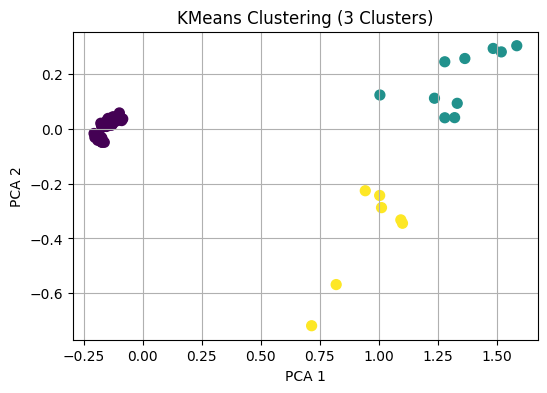

In [14]:
# KMeans dengan 3 cluster
kmeans_3 = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_3 = kmeans_3.fit_predict(scaled_features)

inertia_3 = kmeans_3.inertia_
silhouette_3 = silhouette_score(scaled_features, labels_3)

print(f"[3 Clusters] Inertia: {inertia_3:.4f}, Silhouette Score: {silhouette_3:.4f}")

plt.figure(figsize=(6, 4))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels_3, cmap='viridis', s=50)
plt.title("KMeans Clustering (3 Clusters)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()


#### Visualisasi 3D Clustering Pada Data Iris Menggunakan K-Means Menjadi 3 Cluster

[3 Clusters] Inertia: 1.7835, Silhouette Score: 0.9111


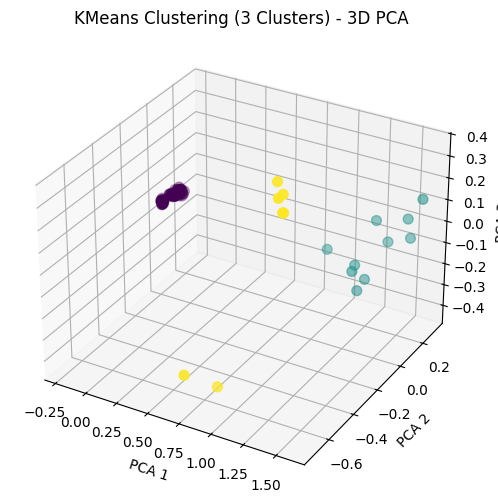

In [15]:
# PCA dengan 3 komponen
pca_3d = PCA(n_components=3)
reduced_features_3d = pca_3d.fit_transform(scaled_features)

# KMeans dengan 3 cluster
kmeans_3 = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_3 = kmeans_3.fit_predict(scaled_features)

# Evaluasi
inertia_3 = kmeans_3.inertia_
silhouette_3 = silhouette_score(scaled_features, labels_3)

print(f"[3 Clusters] Inertia: {inertia_3:.4f}, Silhouette Score: {silhouette_3:.4f}")

# Visualisasi 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    reduced_features_3d[:, 0],
    reduced_features_3d[:, 1],
    reduced_features_3d[:, 2],
    c=labels_3,
    cmap='viridis',
    s=50
)

ax.set_title("KMeans Clustering (3 Clusters) - 3D PCA")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.grid(True)
plt.show()


### Clustering Pada Data Iris Menggunakan K-Means Menjadi 4 Cluster

Kemudian pada sesi ini dilanjutkan clustering menjadi 4 cluster. Lalu dilakukan juga visualisasi 2D dan 3D menggunakan PCA.

#### Visualisasi 2D Clustering Pada Data Iris Menggunakan K-Means Menjadi 4 Cluster

[4 Clusters] Inertia: 0.8404, Silhouette Score: 0.9210


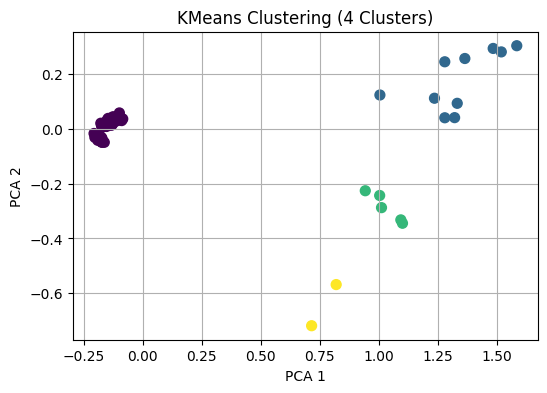

In [16]:
# KMeans dengan 4 cluster
kmeans_4 = KMeans(n_clusters=4, random_state=42, n_init=10)
labels_4 = kmeans_4.fit_predict(scaled_features)

inertia_4 = kmeans_4.inertia_
silhouette_4 = silhouette_score(scaled_features, labels_4)

print(f"[4 Clusters] Inertia: {inertia_4:.4f}, Silhouette Score: {silhouette_4:.4f}")

plt.figure(figsize=(6, 4))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels_4, cmap='viridis', s=50)
plt.title("KMeans Clustering (4 Clusters)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()

#### Visualisasi 3D Clustering Pada Data Iris Menggunakan K-Means Menjadi 4 Cluster

[4 Clusters] Inertia: 0.8404, Silhouette Score: 0.9210


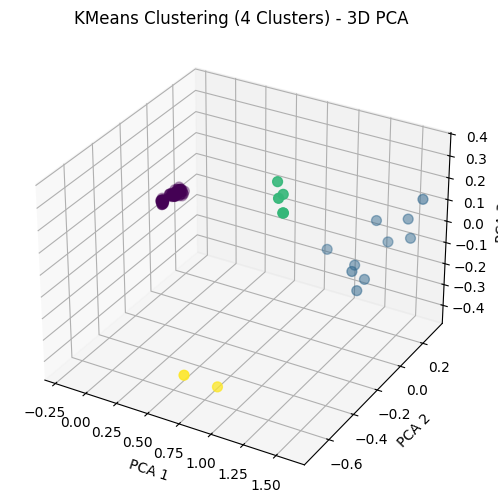

In [17]:
# PCA dengan 3 komponen
pca_3d = PCA(n_components=3)
reduced_features_3d = pca_3d.fit_transform(scaled_features)

# KMeans dengan 4 cluster
kmeans_4 = KMeans(n_clusters=4, random_state=42, n_init=10)
labels_4 = kmeans_4.fit_predict(scaled_features)

inertia_4 = kmeans_4.inertia_
silhouette_4 = silhouette_score(scaled_features, labels_4)

print(f"[4 Clusters] Inertia: {inertia_4:.4f}, Silhouette Score: {silhouette_4:.4f}")

# Visualisasi 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    reduced_features_3d[:, 0],
    reduced_features_3d[:, 1],
    reduced_features_3d[:, 2],
    c=labels_4,
    cmap='viridis',
    s=50
)

ax.set_title("KMeans Clustering (4 Clusters) - 3D PCA")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.grid(True)
plt.show()
